# Working with Unlabeled Data – Clustering Analysis

* Finding centers of similarity using the popular k-means algorithm

* Taking a bottom-up approach to building hierarchical clustering trees

* Identifying arbitrary shapes of objects using a density-based clustering approach


### Grouping objects by similarity using k-means

In [49]:
# Data generation and preprocessing
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

# Vizualisation
import matplotlib.pyplot as plt
from matplotlib import cm

# Machine learning, sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette


In [3]:
x, y = make_blobs(n_samples=150, n_features=2, 
                 centers=3, cluster_std=0.5, 
                 shuffle=True, random_state=0)

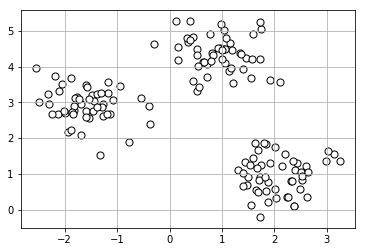

In [4]:
plt.scatter(x[:,0], x[:,1], c='white', 
            marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

In [7]:
km = KMeans(n_clusters=3, init='random', 
           n_init=10, max_iter=300, tol=1e-04,
           random_state=0)

In [8]:
y_km = km.fit_predict(x)

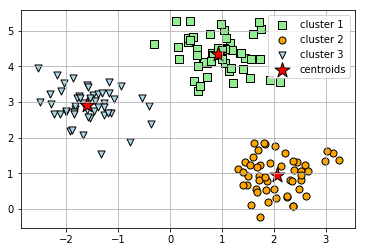

In [10]:
plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, 
           c='lightgreen', marker='s', 
            edgecolor='black', label='cluster 1')

plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, 
           c='orange', marker='o', 
            edgecolor='black', label='cluster 2')

plt.scatter(x[y_km==2,0], x[y_km==2,1], s=50, 
           c='lightblue', marker='v', 
            edgecolor='black', label='cluster 3')

plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], s=250, 
           marker='*', c='red', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Using the elbow method to find the optimal number of clusters

In [11]:
km.inertia_

72.47601670996698

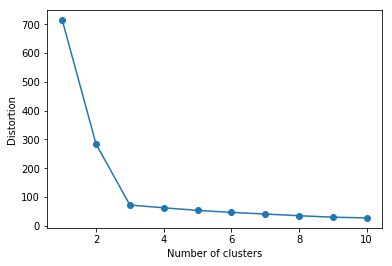

In [13]:
distortions = []

for i in range(1,11):
    kme = KMeans(n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, 
                random_state=0)
    
    kme.fit(x)
    distortions.append(kme.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Quantifying the quality of clustering via silhouette plots

In [15]:
kme = KMeans(n_clusters=3, init='k-means++', 
            n_init=10, max_iter=300, tol=1e-04, 
            random_state=0)

In [16]:
y_kme = kme.fit_predict(x)

In [17]:
cluster_labels = np.unique(y_kme)
n_clusters = cluster_labels.shape[0]

In [18]:
silhouette_vals = silhouette_samples(x, y_kme, 
                                    metric='euclidean')

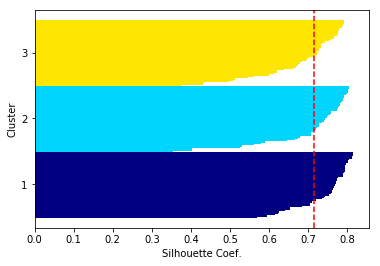

In [27]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kme==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
           c_silhouette_vals, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', 
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coef.')
plt.show()

In [28]:
kms = KMeans(n_clusters=2, init='k-means++', 
           n_init=10, max_iter=300, tol=1e-04,
           random_state=0)

In [29]:
y_kms = kms.fit_predict(x)

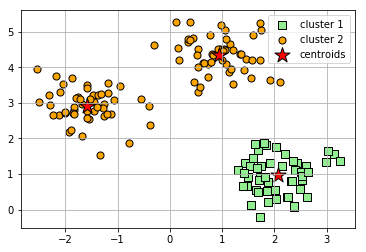

In [31]:
plt.scatter(x[y_kms==0,0], x[y_kms==0,1], s=50, 
           c='lightgreen', marker='s', 
            edgecolor='black', label='cluster 1')

plt.scatter(x[y_kms==1,0], x[y_kms==1,1], s=50, 
           c='orange', marker='o', 
            edgecolor='black', label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], s=250, 
           marker='*', c='red', edgecolor='black',
           label='centroids')

plt.legend()
plt.grid()
plt.show()

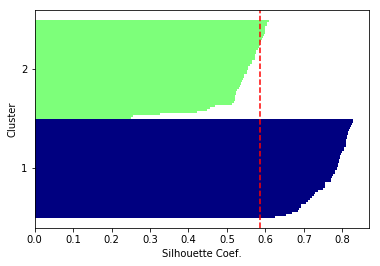

In [34]:
cluster_labels = np.unique(y_kms)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x, y_kms, 
                                    metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kme==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
           c_silhouette_vals, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', 
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coef.')
plt.show()

### Organizing clusters as a hierarchical tree

#### Grouping clusters in bottom-up fashion

In [36]:
np.random.seed(123)
variables = ['x', 'y', 'z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

In [42]:
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, 
                  columns = variables, 
                  index=labels)

In [43]:
df

,x,y,z
ID_0,2.504554,4.830343,9.855598
ID_1,5.194851,6.128945,1.206287
ID_2,8.263408,6.030601,5.450680
ID_3,3.427638,3.041208,4.170222
ID_4,6.813008,8.754568,5.104223


#### Performing hierachical clustering on distance matrix

In [44]:
row_dist = pd.DataFrame(squareform(
            pdist(df, metric='euclidean')),
                       columns=labels, 
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,9.150664,7.349036,6.031301,7.519168
ID_1,9.150664,0.000000,5.238376,4.630559,4.970537
ID_2,7.349036,5.238376,0.000000,5.827582,3.105429
ID_3,6.031301,4.630559,5.827582,0.000000,6.706383
ID_4,7.519168,4.970537,3.105429,6.706383,0.000000


In [46]:
row_clusters = linkage(df.values, 
                       method='complete',
                      metric='euclidean')

In [47]:
pd.DataFrame(row_clusters, 
            columns=['1', '2', 'dist', '# items'],
            index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])])

,1,2,dist,# items
cluster 1,2.0,4.0,3.105429,2.0
cluster 2,1.0,3.0,4.630559,2.0
cluster 3,5.0,6.0,6.706383,4.0
cluster 4,0.0,7.0,9.150664,5.0


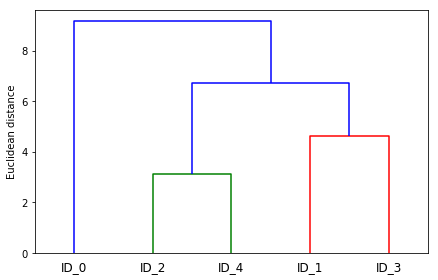

In [50]:
row_dendr = dendrogram(row_clusters,
                      labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()